<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/Copy_of_Unit_4_ML_Logistic_Regression_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [ ]:
import pandas as pd

In [ ]:
data = pd.re

AttributeError: ignored

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


BT: there are 12 columns in the data set. The target variable is the number of people who survived the sinking of the Titanic. A zero Survived value means the passenger did not survive, and a 1 means the passenger did survive. Pclass refers to 1st, 2nd, or 3rd class passengers. 

# EDA (Exploratory Data Analysis)

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

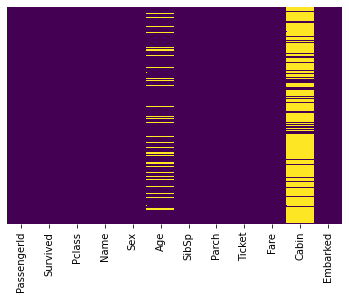

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

BT: This is a heat map showing that the Age and Cabin columns have missing data. Cabin is missing more data than Age. 

## Class


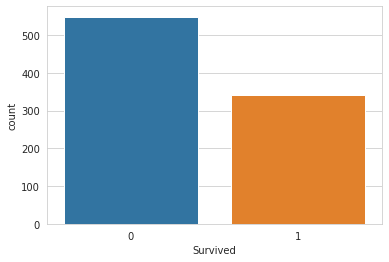

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

BT: approximately 550 passengers died (indicated by 0) and 330 survived (indicated by 1)

## Survived

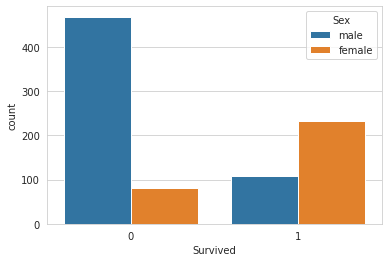

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

BT: Approximately 470 males and 80 females died, and 110 males and 220 females survived. 

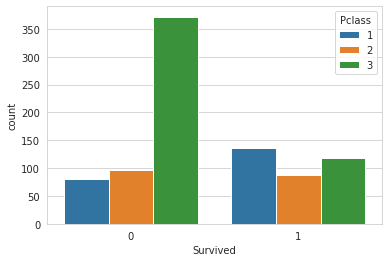

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

BT: Third-class passengers by far accounted for most of the deaths. The rank order for deaths was 3rd class, followed by second class, followed by first class. Among survivors, first class passengers were most prevalent, although the class differences among survivors were less pronounced. More third class passengers survived than second class passengers. 

## Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


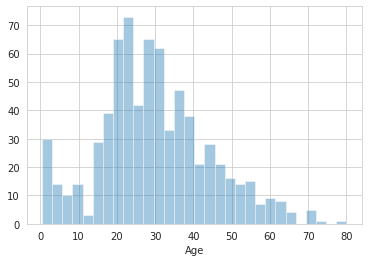

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

BT: The age variable showed a fairly normal distribution, with a slight skew to the right. Most passengers were 20-30-years old. A significant infant population was present, i.e. 30 infants less than 2 years old were on board. Passengers in their early teens were underrepresented. This age visualization doesn't factor in death/survivorship - this would be useful to know. However, the heat map above showed that age data was missing for many passengers. 

## Siblings

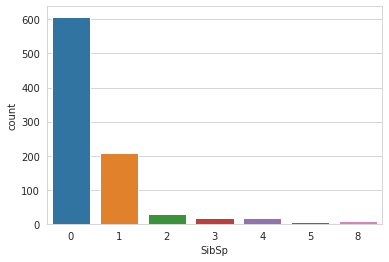

In [ ]:
sns.countplot(x='SibSp',data=train)

BT: Approximately 600 passengers had no siblings, 200 passengers had 1 sibling, 20 passengers had 2 siblings. There was one family having 8 siblings. 

# Data Cleaning and Data Pre - Processing

In [ ]:
train.drop('Cabin', axis=1, inplace= True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


BT: 5 of the 12 columns were dropped, leaving 7 columns in the train data frame. The 5 columns dropped (Cabin, Sex, Embarked, Name, Ticket) didn't have much predictive value, i.e. didn't impact the outcome of the model. Sex and Embark however will be added back to the model later as 'male' and 'S' columns with values of 0 for yes and 1 for no.

In [ ]:
train = pd.concat([train, sex, embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
BT: 3 columns were added back to train, male (formerly 'Sex'), Q, and S (formerly 'Embark'), resulting in 10 columns. The gender is 
now indicated with a 1 or 0 instead of "male" or "female". The model performs better with numeric values being fed in compared with 
text values. The 0 and 1 values used in the columns male, Q, and S are categorical values. 

# Model building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

BT: The data is being split 70% for training, 30% for testing.  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

BT: importing the linear data into the logistic model

In [ ]:
logmodel.fit(X_train, y_train)

NameError: ignored

In [ ]:
predict = logmodel.predict(X_test)

## Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.72      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [ ]:
BT: These statistics describe how well the model predicted results, i.e. the model predicted the deaths correctly for 82% of the 
passengers and predicted the survials correctly for 70% of the patients. The 82% and 72% represent True Positive Rate and True 
Negative Rate, respectively, and both figures appear in the Confusion Matrix below. The 76% is the average of the 82% and 70%, and 
77% is obtained as 82% x 128/(128+86) + 70% x 86/(128+86). 


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[105  23]
 [ 26  60]]


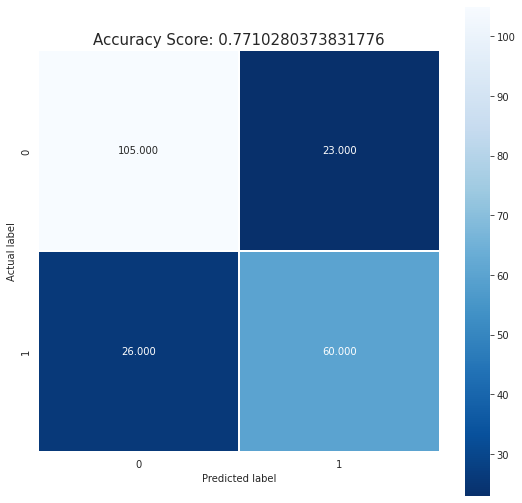

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

BT: The model performed with an overall accuracy of (105+60)/(105+60+23+26) = 77%. That's according to the formula (TP+TN)/(TP+TN+FP+FN). The True Positive Rate was 105/(105+23) = 82%, and the True Negative Rate was 60/(60 + 26) = 70%. TP refers to deaths, and TN refers to survivors. The overall misclassification rate was (23+26)/(105+60+23+26) = 23%. The False Positive Rate (Type 1 error) was 23/(23 + 105) = 18%. The False Negative Rate (Type 2 error) was 26/(60+26) = 30%. 

In [ ]:
from sklearn import  metrics

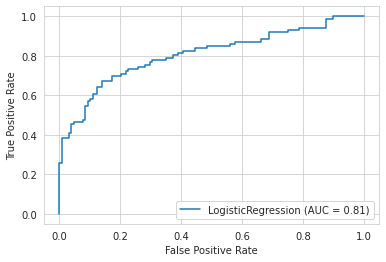

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

Observation..

# Conclusion...

BT: As explained under the graphs, the passengers who did not survive the sinking of the Titanic tended to be third-class male passengers. Males were more likely to die than females, and 3rd class passengers were more likely to die than 2nd class passengers, who were more likely to die than first class passengers. The survivorship in relation to age was not determined here. The model was 77% accurate overall. 